# TODO: Title

This notebook lists all the steps that you need to complete the complete this project. You will need to complete all the TODOs in this notebook as well as in the README and the two python scripts included with the starter code.


**TODO**: Give a helpful introduction to what this notebook is for. Remember that comments, explanations and good documentation make your project informative and professional.

**Note:** This notebook has a bunch of code and markdown cells with TODOs that you have to complete. These are meant to be helpful guidelines for you to finish your project while meeting the requirements in the project rubrics. Feel free to change the order of these the TODO's and use more than one TODO code cell to do all your tasks.

In [ ]:
# TODO: Install any packages that you might need
# For instance, you will need the smdebug package
!pip install smdebug

In [ ]:
# TODO: Import any packages that you might need
# For instance you will need Boto3 and Sagemaker
import sagemaker
import boto3

from sagemaker.pytorch import PyTorch
from sagemaker import get_execution_role
from sagemaker.debugger import (
    Rule,
    DebuggerHookConfig,
    rule_configs,
    ProfilerRule
)

from sagemaker.tuner import (
    IntegerParameter,
    CategoricalParameter,
    ContinuousParameter,
    HyperparameterTuner,
)


In [9]:
import os
import matplotlib.pyplot as plt 

## Dataset
TODO: Explain what dataset you are using for this project. Maybe even give a small overview of the classes, class distributions etc that can help anyone not familiar with the dataset get a better understand of it.

In [10]:
PATH_BINDER = "/"

TRAIN_PATH = "dogImages" + PATH_BINDER + "dogImages" + PATH_BINDER + "train"
TEST_PATH = "dogImages" + PATH_BINDER + "dogImages" + PATH_BINDER + "test"
train_class_folder_names = os.listdir(TRAIN_PATH)
test_class_folder_names = os.listdir(TEST_PATH)


train_class_map = {str(int(folder.split(".")[0])): folder.split(".")[
    1] for folder in train_class_folder_names}
test_class_map = {str(int(folder.split(".")[0])): folder.split(".")[
    1] for folder in test_class_folder_names}


def create_meta_dict(path, path_delimiter, folder_names):
    meta_data_dict = {
        "image_name": [],
        "image_paths": [],
        "class_idx": [],
        "class_name": [],
        "idx": []
    }
    idx = 0

    for folder in folder_names:
        tmp = os.listdir(path + path_delimiter + folder)
        meta_data_dict["image_name"] += tmp
        meta_data_dict["image_paths"] += [path_delimiter +
                                          folder + path_delimiter + name for name in tmp]
        meta_data_dict["class_idx"] += [int(folder.split(".")[0])] * len(tmp)
        meta_data_dict["class_name"] += [folder.split(".")[1]] * len(tmp)
        meta_data_dict["idx"] += [i for i in range(idx, idx + len(tmp), 1)]
        idx += len(tmp)
    return meta_data_dict


meta_data_dict_train = create_meta_dict(
    TRAIN_PATH, PATH_BINDER, train_class_folder_names)
meta_data_dict_test = create_meta_dict(
    TEST_PATH, PATH_BINDER, test_class_folder_names)
train_size = len(meta_data_dict_train["image_name"])
test_size = len(meta_data_dict_test["image_name"])


This Data set has {} samples in the training set 6679
The Number of classes: 133
Most frequently Occuring class: ('005', 'Alaskan_malamute') - 77
Least frequently Occuring class: ('108', 'Norwegian_buhund') - 26


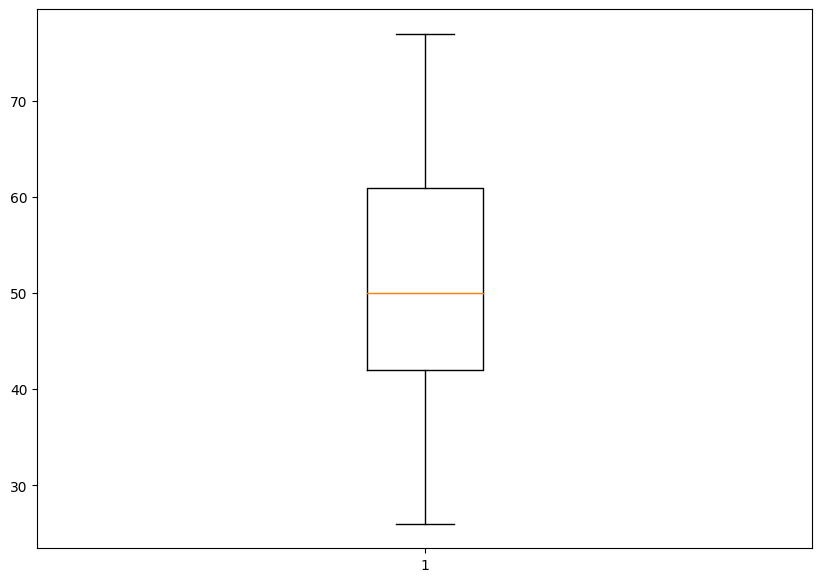

In [11]:
train_freq_dict = {}
mode = 0
mode_class = None
inv_mode = 999999
inv_mode_class = None
for folder in train_class_folder_names:
    tmp = os.listdir(TRAIN_PATH + PATH_BINDER + folder)

    train_freq_dict[folder.split(".")[1]] = len(tmp)
    # Most Frequent
    if (mode < len(tmp)):
        mode = len(tmp)
        mode_class = (folder.split(".")[0], folder.split(".")[1])

    # Least Frequent
    if (inv_mode > len(tmp)):
        inv_mode = len(tmp)
        inv_mode_class = (folder.split(".")[0], folder.split(".")[1])

no_of_classes = len(test_class_map.values())
print("This Data set has {} samples in the training set", train_size)
print("The Number of classes: {}".format(no_of_classes))
print("Most frequently Occuring class: {} - {}".format(mode_class, mode))
print("Least frequently Occuring class: {} - {}".format(inv_mode_class, inv_mode))


fig = plt.figure(figsize=(10, 7))

# Creating plot
plt.boxplot(train_freq_dict.values())

# show plot
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_35432\2301000329.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticks, rotation="vertical")


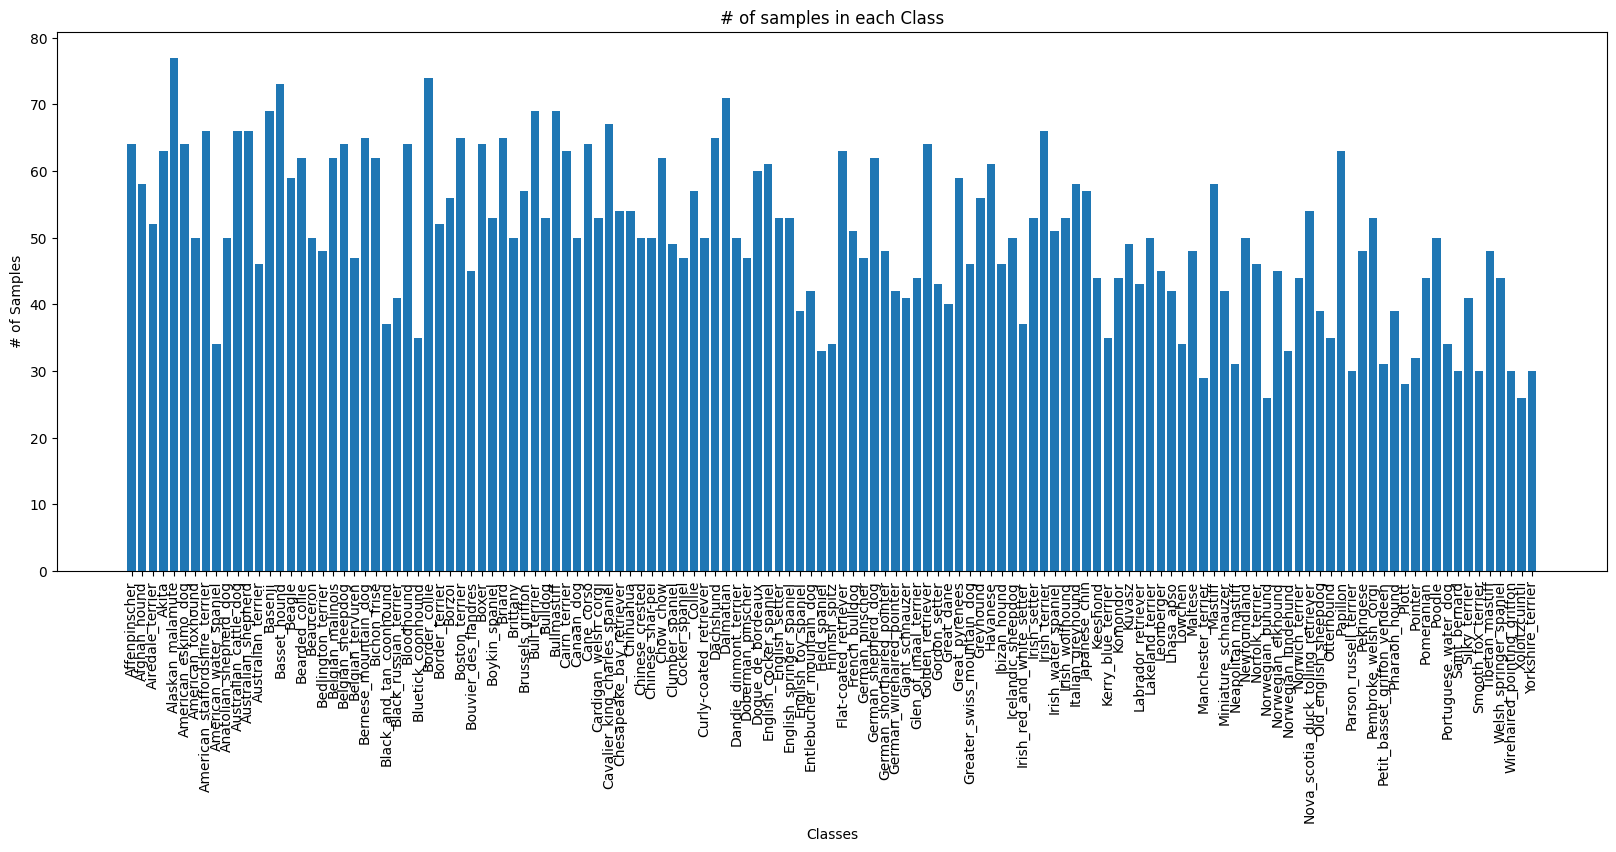

In [12]:
freqs = list(train_freq_dict.values())
xticks = list(train_freq_dict.keys())

fig, ax = plt.subplots(figsize=(20, 7))
ax.set_xticklabels(xticks, rotation="vertical")
# fig = plt.figure(figsize=(50, 7))
# fig.set_xticklabels()
ax.bar(xticks, freqs, orientation='vertical')

plt.xlabel("Classes")
plt.ylabel("# of Samples")
plt.title("# of samples in each Class")
plt.savefig('images/training-data_class_dist.png')


This Data set has 836 samples in the testing set
The Number of classes: 133
Most frequently Occuring class: ('005', 'Alaskan_malamute') - 10
Least frequently Occuring class: ('102', 'Manchester_terrier') - 3


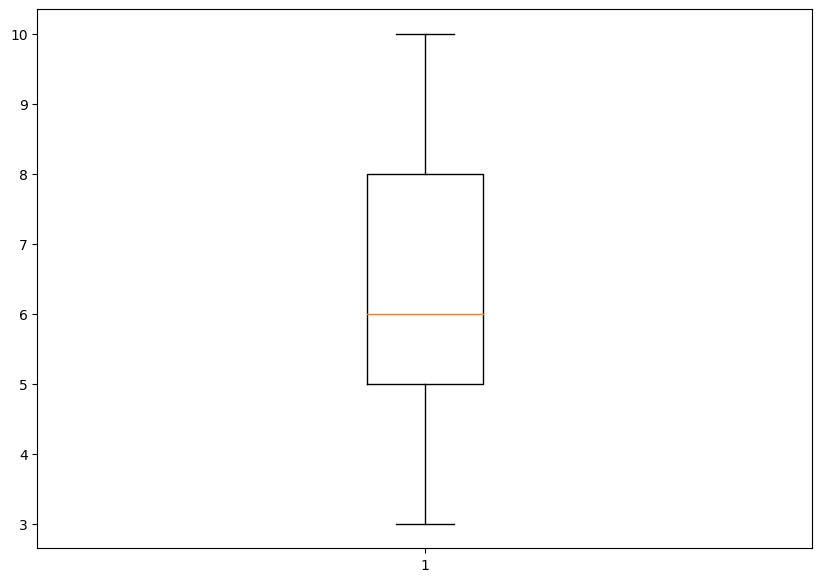

In [13]:
test_freq_dict = {}
mode = 0
mode_class = None
inv_mode = 999999
inv_mode_class = None
for folder in test_class_folder_names:
    tmp = os.listdir(TEST_PATH + PATH_BINDER + folder)

    test_freq_dict[folder.split(".")[1]] = len(tmp)
    # Most Frequent
    if (mode < len(tmp)):
        mode = len(tmp)
        mode_class = (folder.split(".")[0], folder.split(".")[1])

    # Least Frequent
    if (inv_mode > len(tmp)):
        inv_mode = len(tmp)
        inv_mode_class = (folder.split(".")[0], folder.split(".")[1])

no_of_classes = len(test_class_map.values())
print("This Data set has {} samples in the testing set".format(test_size))
print("The Number of classes: {}".format(no_of_classes))
print("Most frequently Occuring class: {} - {}".format(mode_class, mode))
print("Least frequently Occuring class: {} - {}".format(inv_mode_class, inv_mode))


fig = plt.figure(figsize=(10, 7))

# Creating plot
plt.boxplot(test_freq_dict.values())

# show plot
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_35432\1081638960.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticks, rotation="vertical")


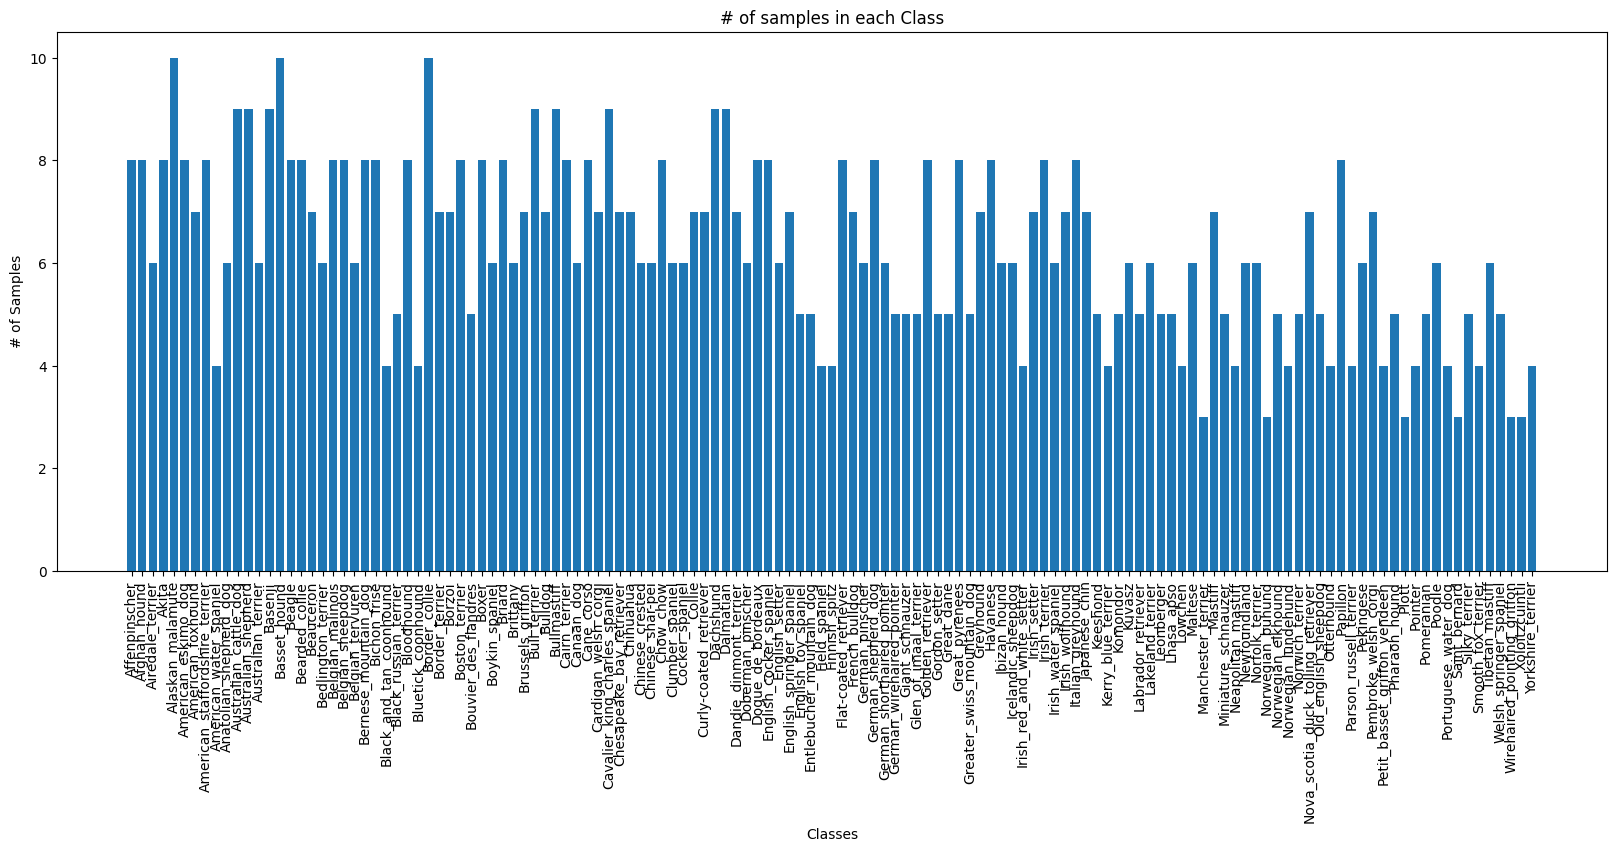

In [14]:
freqs = list(test_freq_dict.values())
xticks = list(test_freq_dict.keys())

fig, ax = plt.subplots(figsize=(20, 7))
ax.set_xticklabels(xticks, rotation="vertical")
# fig = plt.figure(figsize=(50, 7))
# fig.set_xticklabels()
ax.bar(xticks, freqs, orientation='vertical')
plt.xlabel("Classes")
plt.ylabel("# of Samples")
plt.title("# of samples in each Class")
plt.savefig('images/testing_data_class_dist.png')


In [ ]:
#TODO: Fetch and upload the data to AWS S3

# Command to download and unzip data
!wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
!unzip dogImages.zip

## Hyperparameter Tuning
**TODO:** This is the part where you will finetune a pretrained model with hyperparameter tuning. Remember that you have to tune a minimum of two hyperparameters. However you are encouraged to tune more. You are also encouraged to explain why you chose to tune those particular hyperparameters and the ranges.

**Note:** You will need to use the `hpo.py` script to perform hyperparameter tuning.

In [ ]:
#TODO: Declare your HP ranges, metrics etc.
hyperparameters = {"epochs": "2", "batch-size": CategoricalParameter(
    [32, 64, 128, 256]), "test-batch-size": "100", "lr": ContinuousParameter(0.001, 0.1)}


objective_metric_name = "average test loss"
objective_type = "Minimize"
metric_definitions = [{"Name": "average test loss",
                       "Regex": "Test set: Average loss: ([0-9\\.]+)"}]


In [ ]:
#TODO: Create estimators for your HPs

estimator = PyTorch(
    entry_point="train_model.py",
    base_job_name="sagemaker-script-mode",
    role=get_execution_role(),
    instance_count=1,
    instance_type="ml.m5.large",
    hyperparameters=hyperparameters,
    framework_version="1.8",
    py_version="py36",
)
# TODO: Your estimator here

tuner = HyperparameterTuner(
    estimator,
    objective_metric_name,
    hyperparameter_ranges,
    metric_definitions,
    max_jobs=4,
    max_parallel_jobs=2,
    objective_type=objective_type
    )# TODO: Your HP tuner here

In [ ]:
# TODO: Fit your HP Tuner
tuner.fit() # TODO: Remember to include your data channels

In [1]:
# TODO: Get the best estimators and the best HPs

best_estimator = tuner.best_estimator()  # TODO

#Get the hyperparameters of the best trained model
best_hyperameters = best_estimator.hyperparameters()
print(best_hyperameters)


NameError: name 'tuner' is not defined

## Model Profiling and Debugging
TODO: Using the best hyperparameters, create and finetune a new model

**Note:** You will need to use the `train_model.py` script to perform model profiling and debugging.

In [ ]:
# TODO: Set up debugging and profiling rules and hooks
rules = [
    Rule.sagemaker(rule_configs.vanishing_gradient()),
    Rule.sagemaker(rule_configs.overfit()),
    Rule.sagemaker(rule_configs.overtraining()),
    Rule.sagemaker(rule_configs.poor_weight_initialization()),
    ProfilerRule.sagemaker(rule_configs.ProfilerReport()),
]


hook_config = DebuggerHookConfig(
    hook_parameters={"train.save_interval": "100", "eval.save_interval": "10"}
)


In [ ]:
# TODO: Create and fit an estimator
estimator = PyTorch(
    entry_point="pytorch_mnist.py",
    base_job_name="smdebugger-mnist-pytorch",
    role=get_execution_role(),
    instance_count=1,
    instance_type="ml.m5.large",
    hyperparameters=best_hyperameters,
    framework_version="1.8",
    py_version="py36",
    # Debugger parameters
    rules=rules,
    debugger_hook_config=hook_config,
)
# TODO: Your estimator here
estimator.fit(wait=True)


In [ ]:
# TODO: Plot a debugging output.

job_name = estimator.latest_training_job.name
client = estimator.sagemaker_session.sagemaker_client
description = client.describe_training_job(
    TrainingJobName=estimator.latest_training_job.name)


In [ ]:
from smdebug.trials import create_trial
from smdebug.core.modes import ModeKeys

trial = create_trial(estimator.latest_job_debugger_artifacts_path())


In [ ]:
def get_data(trial, tname, mode):
    tensor = trial.tensor(tname)
    steps = tensor.steps(mode=mode)
    vals = []
    for s in steps:
        vals.append(tensor.value(s, mode=mode))
    return steps, vals


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot


def plot_tensor(trial, tensor_name):

    steps_train, vals_train = get_data(trial, tensor_name, mode=ModeKeys.TRAIN)
    print("loaded TRAIN data")
    steps_eval, vals_eval = get_data(trial, tensor_name, mode=ModeKeys.EVAL)
    print("loaded EVAL data")

    fig = plt.figure(figsize=(10, 7))
    host = host_subplot(111)

    par = host.twiny()

    host.set_xlabel("Steps (TRAIN)")
    par.set_xlabel("Steps (EVAL)")
    host.set_ylabel(tensor_name)

    (p1,) = host.plot(steps_train, vals_train, label=tensor_name)
    print("completed TRAIN plot")
    (p2,) = par.plot(steps_eval, vals_eval, label="val_" + tensor_name)
    print("completed EVAL plot")
    leg = plt.legend()

    host.xaxis.get_label().set_color(p1.get_color())
    leg.texts[0].set_color(p1.get_color())

    par.xaxis.get_label().set_color(p2.get_color())
    leg.texts[1].set_color(p2.get_color())

    plt.ylabel(tensor_name)

    plt.show()


In [ ]:
plot_tensor(trial, "nll_loss_output_0")


**TODO**: Is there some anomalous behaviour in your debugging output? If so, what is the error and how will you fix it?  
**TODO**: If not, suppose there was an error. What would that error look like and how would you have fixed it?

In [ ]:
# TODO: Display the profiler output
rule_output_path = estimator.output_path + \
    estimator.latest_training_job.job_name + "/rule-output"


## Model Deploying

In [ ]:
# TODO: Deploy your model to an endpoint

predictor=estimator.deploy() # TODO: Add your deployment configuration like instance type and number of instances

In [ ]:
# TODO: Run an prediction on the endpoint

image = # TODO: Your code to load and preprocess image to send to endpoint for prediction
response = predictor.predict(image)

In [ ]:
# TODO: Remember to shutdown/delete your endpoint once your work is done
predictor.delete_endpoint()